In [ ]:
import json
import gzip
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings

# Filter out DeprecationWarning related to sampling from a set
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Function to read and extract JSON data from the zipped file
def read_json_from_zip(zip_file_path):
    data = []
    with gzip.open(zip_file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return data

In [ ]:
# Function to read JSON data from the file
def read_json_file(json_file_path):
    data = []
    with open(json_file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return data

Fetching Data

In [ ]:
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/final_data/meta_AMAZON_FASHION.json.gz'

meta = read_json_from_zip(zip_file_path)

In [ ]:
# Convert each JSON object into a dictionary
metadata = [{key: value for key, value in item.items()} for item in meta]

In [ ]:
# Path to the zipped JSON file
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/final_data/AMAZON_FASHION.json.gz'

# Extract JSON data
rev = read_json_from_zip(zip_file_path)

In [ ]:
# Convert each JSON object into a dictionary
reviews = [{key: value for key, value in item.items()} for item in rev]

Printing distinct keys

In [ ]:
# Create an empty set to store distinct keys
distinct_keys = set()

# Iterate through each line of JSON data
for item in metadata:
    # Update the distinct keys set with the keys in the current item
    distinct_keys.update(item.keys())

# Now, distinct_keys contains all unique keys present in the JSON data
print(distinct_keys)

# Define the list of required keys as the distinct keys set
required_keys = list(distinct_keys)

# Iterate through each line of JSON data
for item in metadata:
    # Check if each required key is present in the dictionary
    for key in required_keys:
        if key not in item:
            # If key is missing, set its value to None
            item[key] = None

{'asin', 'brand', 'title', 'tech1', 'description', 'details', 'also_buy', 'imageURL', 'rank', 'also_view', 'imageURLHighRes', 'price', 'fit', 'feature', 'date', 'similar_item'}


In [ ]:
for i in range(20):
    try:
        print(metadata[i]['imageURLHighRes'])
    except (KeyError, IndexError) as e:
        print(f"Error for line {i}: {e}")

['https://images-na.ssl-images-amazon.com/images/I/51bSrINiWpL.jpg']
['https://images-na.ssl-images-amazon.com/images/I/41BCH7-4vHL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/41FpbB--SoL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51twQYJo0NL.jpg']
['https://images-na.ssl-images-amazon.com/images/I/4196%2BTu5T%2BL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/31N2zBaedSL.jpg']
['https://images-na.ssl-images-amazon.com/images/I/41VHFlSGjoL.jpg']
['https://images-na.ssl-images-amazon.com/images/I/418HGjTDbRL.jpg']
['https://images-na.ssl-images-amazon.com/images/I/41XfVtdsiJL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/41%2BNbtV5c5L.jpg', 'https://images-na.ssl-images-amazon.com/images/I/41DvPo37jNL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/41KvxNrHleL.jpg']
None
['https://images-na.ssl-images-amazon.com/images/I/411ROWXlw7L.jpg', 'https://images-na.ssl-images-amazon.com/images/I/41SHFi5P3oL.jpg', 'https://images-na.ssl-images-

In [ ]:
# Initialize an empty dictionary to store brand counts
brand_counts = {}

# Iterate through each dictionary in metadata
for item in metadata:
    # Extract the brand name from the current item
    brand = item.get('brand', 'Unknown')  # Use 'Unknown' as default if brand is not available

    # Update the brand count in the dictionary
    if brand in brand_counts:
        brand_counts[brand] += 1
    else:
        brand_counts[brand] = 1

In [ ]:
# Print the total number of distinct brands
total_distinct_brands = len(brand_counts)
print("Total number of distinct brands:", total_distinct_brands)

print("Unknown:",brand_counts['Unknown'])

Total number of distinct brands: 18514
Unknown: 574


In [ ]:
# Print the brand counts dictionary
for brand, count in brand_counts.items():
    print(f"{brand}: {count}")

Streaming output truncated to the last 5000 lines.
Aspen Supply: 4
Laverapelle: 3
Cosmozz: 42
Diesel Tees: 5
Republica: 1
Hardcore Water Sports: 4
HLBandage: 2
Gesun: 1
SelfTek: 2
A&T: 24
TINYAT: 1
LOVEBEAUTY: 3
ATTI CLOTHING: 1
Betti Charm: 8
HoJax: 2
vksa: 5
HARRISON83: 18
MO GOOD: 4
TGQ: 1
D&F: 1
6AMCRISIS: 1
Tusong: 2
USKEES: 1
EOVE: 2
GatoPop: 1
Mr. WantDo: 4
PriKinder: 3
A Christmas Story: 1
Native pride caps & hats: 1
bettyhome: 1
FUSHUO: 7
Mani: 1
WODISON: 4
Clover Bridal: 6
Uber-Tees: 1
HaoMing Women Clothing: 13
Futrzane: 1
Harv Benard: 3
Infinity: 6
Little Mouse: 7
MereGuti: 1
Nuoke: 4
Lupangs: 1
Christian Caps & Hats: 2
Anime Hoodie: 5
Tabiya: 3
Cathyer: 1
Infinite Bit: 1
Squat Sponge: 1
BOAO Hooded Sweatshirt: 1
Menschwear: 2
HEJIAXIN Beanies: 1
Qin.Orianna: 6
KARMA PROM: 3
Time Dresses: 1
Followme2shop Cute Sweaters: 1
PengNing: 15
Glamorous: 2
Vidlea: 3
Mural Art: 1
MS LOVE: 1
Rock'em Apparel: 7
Gazooz: 1
Love My Seamless: 4
Flycat: 7
Fly Cat: 1
E Support: 8
Elif: 1
Gaud

In [ ]:
def create_user_id_mapping(reviews):
    user_id_mapping = {}  # Initialize an empty dictionary to store the mapping
    unique_user_ids = set(review['reviewerID'] for review in reviews)  # Get unique user IDs

    # Assign integer numbers to each unique user ID
    for i, user_id in enumerate(unique_user_ids):
        user_id_mapping[user_id] = i

    return user_id_mapping

In [ ]:
user_id = create_user_id_mapping(reviews)

In [ ]:
def extract_ratings(reviews):
    ratings = {}
    for review in reviews:
        userid = user_id[review['reviewerID']]
        itemid = review['asin']
        rating = review['overall']
        ratings[(userid, itemid)] = rating
    return ratings

In [ ]:
ratings = extract_ratings(reviews)

In [ ]:
import random

sample_keys = random.sample(ratings.keys(), 5)  # Sample 5 random keys
for key in sample_keys:
    print(key, ":", ratings[key])


(237048, 'B017425OJS') : 5.0
(22877, 'B00GIHA7U2') : 5.0
(195938, 'B001M5ELM0') : 3.0
(66203, 'B002EBP346') : 5.0
(33523, 'B016R95KKW') : 5.0


<ipython-input-22-02c65711d294>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample_keys = random.sample(ratings.keys(), 5)  # Sample 5 random keys


In [ ]:
import string

In [ ]:
def preprocess_text(text):
    # Convert text to lowercase and remove punctuation
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = text.split()
    return tokens

In [ ]:
def create_user_item_word_dict(reviews):
    user_item_word_review_dict = {}
    user_item_word_summary_dict = {}
    for review in reviews:
        user = review['reviewerID']
        item = review['asin']
        review_text = review.get('reviewText', '')
        #change to string
        summary_text = review.get('summary', '')

        # Create (user, item) key
        user_item_key = (user_id[user], item)

        user_item_word_review_dict[user_item_key] = review_text
        user_item_word_summary_dict[user_item_key] = summary_text

    return user_item_word_review_dict, user_item_word_summary_dict

In [ ]:
user_item_word_review_dict, user_item_word_summary_dict = create_user_item_word_dict(reviews)

In [ ]:
import random

sample_keys = random.sample(ratings.keys(), 5)  # Sample 5 random keys
for key in sample_keys:
    print(key, ":", user_item_word_review_dict[key])

(472295, 'B00K2QLXL2') : Love the style! The top is just a little too small, but the bottoms fit perfectly!
(469833, 'B00QFS1MOY') : Nice, thin and comfortable fabric at a very reasonable price. I have bought several.
(194139, 'B01BFO4EQU') : I couldn't find any mittens in the stores yet for my six month old (bought them in October before cold gear arrived in stores), so I bought these because of how cute they looked. They are cute but the fabric is thin and doesn't really keep his hands warm. So now that cold weather stuff is in stores, I bought heavier mittens for warmth.
(33208, 'B0049AORIS') : I love the case but I wish the slot were a little wider for gear S3 bands but they will fix. I'm also not sure what the hook is the middle is for.
(298328, 'B00D77WDB2') : Beautiful, thank you!


In [ ]:
import random

sample_keys = random.sample(ratings.keys(), 5)  # Sample 5 random keys
for key in sample_keys:
    print(key, ":", user_item_word_summary_dict[key])

(671653, 'B00EFW58LK') : Supper cute!
(178690, 'B00065G11Q') : Five Stars
(720989, 'B005I4MED4') : Chambray shirt
(397029, 'B00M8NLR1I') : and it broke in half when I tried to bend it to make it less painful to wear
(12754, 'B014KG5TDM') : On time delivery and great giftbox.


In [ ]:
# Create an empty set to store distinct keys
distinct_keys_reviews = set()

# Iterate through each line of JSON data
for item in reviews:
    # Update the distinct keys set with the keys in the current item
    distinct_keys_reviews.update(item.keys())

# Now, distinct_keys_reviews contains all unique keys present in the JSON data
print(distinct_keys_reviews)

# # Define the list of required keys as the distinct keys set
# required_keys = list(distinct_keys_reviews)

# # Iterate through each line of JSON data
# for item in reviews:
#     # Check if each required key is present in the dictionary
#     for key in required_keys:
#         if key not in item:
#             # If key is missing, set its value to None
#             item[key] = None

{'unixReviewTime', 'reviewerName', 'overall', 'summary', 'vote', 'style', 'reviewerID', 'verified', 'image', 'reviewText', 'asin', 'reviewTime'}


In [ ]:
def count_items_voted_by_user(ratings):
    items_voted_by_user = {}
    for (user_id, item_id), rating in ratings.items():
        # Check if the user ID already exists in the dictionary, if not, add it
        if user_id not in items_voted_by_user:
            items_voted_by_user[user_id] = 0
        # Increment the count of items voted by the user
        items_voted_by_user[user_id] += 1
    return items_voted_by_user

# Example usage:
# Assume 'ratings' is the dictionary containing user-item pairs as keys and ratings as values
user_items_count = count_items_voted_by_user(ratings)

In [ ]:
import random

sample_keys = random.sample(user_items_count.keys(), 5)  # Sample 5 random keys
for key in sample_keys:
    print(key, ":", user_items_count[key])

632372 : 1
747443 : 1
178814 : 1
564595 : 6
291391 : 1


In [ ]:
total_users = len(user_items_count)
print(total_users)

749233


In [ ]:
def count_users_with_fewer_items(items_voted_by_user, threshold):
    count = 0
    for user_id, num_items in items_voted_by_user.items():
        if num_items <= threshold:
            count += 1
    return count

# Example usage:
# Assume 'user_items_count' is the dictionary containing the count of items voted by each user
threshold = 35  # Example threshold value
num_users_with_fewer_items = count_users_with_fewer_items(user_items_count, threshold)
print("Number of users with <= {} items voted: {}".format(threshold, num_users_with_fewer_items))

Number of users with <= 35 items voted: 749231


In [ ]:
import matplotlib.pyplot as plt

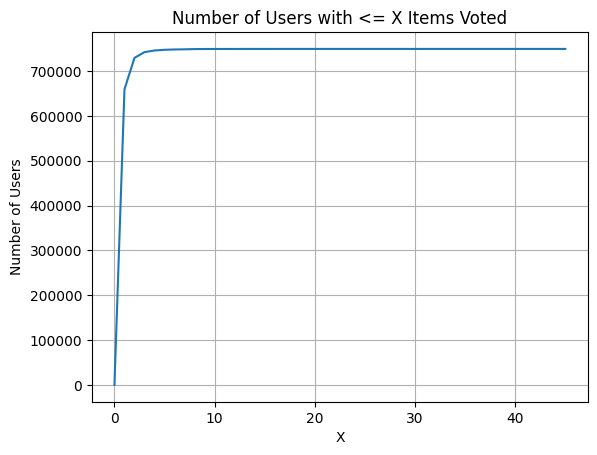

In [ ]:
def plot_users_vs_threshold(items_voted_by_user, max_threshold=45):
    thresholds = range(max_threshold + 1)
    counts = [count_users_with_fewer_items(items_voted_by_user, threshold) for threshold in thresholds]
    plt.plot(thresholds, counts)
    plt.xlabel('X')
    plt.ylabel('Number of Users')
    plt.title('Number of Users with <= X Items Voted')
    plt.grid(True)
    plt.show()

# Example usage:
# Assume 'user_items_count' is the dictionary containing the count of items voted by each user
plot_users_vs_threshold(user_items_count)

In [ ]:
user_item_word_review_dict

{(505313, '7106116521'): 'Exactly what I needed.',
 (178375,
  '7106116521'): "I agree with the other review, the opening is too small.  I almost bent the hook on some very expensive earrings trying to get these up higher than just the end so they're not seen.  Would not buy again but for the price, not sending back.",
 (174285,
  '7106116521'): "Love these... I am going to order another pack to keep in work; someone (including myself) is always losing the back to an earring.  I don't understand why all fish hook earrings don't have them.  Just wish that they were a tiny bit longer.  :)",
 (701145, '7106116521'): 'too tiny an opening',
 (385167, '7106116521'): 'Okay',
 (508951, '7106116521'): 'Exactly what I wanted.',
 (148670,
  '7106116521'): 'These little plastic backs work great.  No more loosing "hook" earrings!  Wish I had ordered these sooner before I had lost some of my favorite earrings!',
 (538408,
  'B00007GDFV'): 'mother - in - law wanted it as a present for her sister. she

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    return tokens



In [ ]:

def create_word_to_index_dict(user_item_word_review_dict, user_item_word_summary_dict):
    word_to_index = {}
    index = 0
    for review_text in user_item_word_review_dict.values():
        # Preprocess review text
        review_text = preprocess_text(review_text)
        # Tokenize preprocessed review text into words
        words = review_text
        for word in words:
            if word not in word_to_index:
                # Assign a unique index to each word
                word_to_index[word] = index
                index += 1

    for summary_text in user_item_word_summary_dict.values():
        # Preprocess summary text
        summary_text = preprocess_text(summary_text)
        # Tokenize preprocessed summary text into words
        words = summary_text
        for word in words:
            if word not in word_to_index:
                # Assign a unique index to each word
                word_to_index[word] = index
                index += 1

    return word_to_index

word_to_index = create_word_to_index_dict(user_item_word_review_dict, user_item_word_summary_dict)

In [ ]:
word_to_index

{'exactly': 0,
 'what': 1,
 'i': 2,
 'needed': 3,
 'agree': 4,
 'with': 5,
 'the': 6,
 'other': 7,
 'review': 8,
 'opening': 9,
 'is': 10,
 'too': 11,
 'small': 12,
 'almost': 13,
 'bent': 14,
 'hook': 15,
 'on': 16,
 'some': 17,
 'very': 18,
 'expensive': 19,
 'earrings': 20,
 'trying': 21,
 'to': 22,
 'get': 23,
 'these': 24,
 'up': 25,
 'higher': 26,
 'than': 27,
 'just': 28,
 'end': 29,
 'so': 30,
 'theyre': 31,
 'not': 32,
 'seen': 33,
 'would': 34,
 'buy': 35,
 'again': 36,
 'but': 37,
 'for': 38,
 'price': 39,
 'sending': 40,
 'back': 41,
 'love': 42,
 'am': 43,
 'going': 44,
 'order': 45,
 'another': 46,
 'pack': 47,
 'keep': 48,
 'in': 49,
 'work': 50,
 'someone': 51,
 'including': 52,
 'myself': 53,
 'always': 54,
 'losing': 55,
 'an': 56,
 'earring': 57,
 'dont': 58,
 'understand': 59,
 'why': 60,
 'all': 61,
 'fish': 62,
 'have': 63,
 'them': 64,
 'wish': 65,
 'that': 66,
 'they': 67,
 'were': 68,
 'a': 69,
 'tiny': 70,
 'bit': 71,
 'longer': 72,
 'okay': 73,
 'wanted': 74,

In [ ]:
import torch
import torch.nn as nn
import string

# Encoder class
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Define the embedding layer
        self.embedding = nn.Embedding(input_size, hidden_size)

        # Define the LSTM layer
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)

    def forward(self, input_seqs, input_lengths, hidden=None):
        embedded = self.embedding(input_seqs)

        # Pack the padded sequence
        packed = nn.utils.rnn.pack_padded_sequence(embedded, input_lengths, batch_first=True, enforce_sorted=False)

        # Pass through LSTM layer
        outputs, hidden = self.lstm(packed, hidden)

        # Unpack the padded sequence
        outputs, _ = nn.utils.rnn.pad_packed_sequence(outputs, batch_first=True)

        return outputs, hidden


def get_review_vectors(encoder, text, word_to_index):
    preprocessed_text = preprocess_text(text)
    # Convert text tokens to indices
    indices = [word_to_index[word] for word in preprocessed_text if word in word_to_index]
    # if not indices:
    #     # Skip empty sequences
    #     continue
    # Convert indices to tensor and get its length
    text_tensor = torch.tensor(indices, dtype=torch.long)  # Explicitly specify the data type as torch.long
    text_length = len(text_tensor)
    # Add a batch dimension
    text_tensor = text_tensor.unsqueeze(0)  # Assuming batch size of 1
    # Pass through encoder
    _, (hidden_state, _) = encoder(text_tensor, [text_length])
    # Use the hidden state as the vector representation
    return hidden_state.squeeze().detach().numpy()  # Convert to numpy array for convenience

# def get_review_vectors(encoder, review_texts, word_to_index):
#     encoded_review_vectors = []
#     for text in review_texts:
#         print(f"Processing text: {text}")
#         preprocessed_text = preprocess_text(text)

#         if not preprocessed_text:
#             # Skip empty sequences
#             print(f"Skipping empty sequence for text: {text}")
#             continue

#         # Convert text tokens to indices
#         indices = [word_to_index[word] for word in preprocessed_text if word in word_to_index]

#         if not indices:
#             # Skip empty indices
#             print(f"Skipping empty indices for text: {text}")
#             continue

#         # Convert indices to tensor and get its length
#         text_tensor = torch.tensor(indices, dtype=torch.long)  # Explicitly specify the data type as torch.long
#         text_length = len(text_tensor)
#         # Add a batch dimension
#         text_tensor = text_tensor.unsqueeze(0)  # Assuming batch size of 1
#         print(f"Input sequence tensor: {text_tensor}, Length: {text_length}")

#         # Pass through encoder
#         try:
#             _, (hidden_state, _) = encoder(text_tensor, [text_length])
#             # Use the hidden state as the vector representation
#             encoded_review_vectors.append(hidden_state.squeeze().detach().numpy())  # Convert to numpy array for convenience
#         except RuntimeError as e:
#             print(f"Error occurred: {e}")
#             print("Skipping this text due to error.")
#             continue
#     return encoded_review_vectors

# Example usage:
input_size = 10000  # Size of vocabulary
hidden_size = 256  # Size of the hidden state
encoder = Encoder(input_size, hidden_size)

# Example review texts
review_texts = "This product is great. I highly recommend it!"

# Dictionary mapping words to their indices in the vocabulary
word_to_index = {
    "this": 1,
    "product": 2,
    "is": 3,
    "great": 4,
    "i": 5,
    "highly": 6,
    "recommend": 7,
    # Add more words to index mapping here
}

# Obtain vector representations for review texts
encoded_review_vectors = get_review_vectors(encoder, review_texts, word_to_index)

# Print the encoded vectors
print(encoded_review_vectors)

[-0.05601201 -0.16355541  0.08059907 -0.20286538  0.09565401 -0.17474915
  0.02133387 -0.15432607  0.08937348  0.05391228 -0.09242333 -0.18323714
 -0.27663144 -0.20158519 -0.00822026  0.0218937  -0.01361087 -0.00574751
  0.21994108 -0.03480216  0.05251911 -0.04224817 -0.05562642  0.03282778
 -0.13563056 -0.0888181  -0.10448355 -0.16448845 -0.10091029  0.06421693
  0.02747813 -0.14841047 -0.08292877 -0.13086621  0.15606892  0.1343242
  0.04938732 -0.02476205 -0.11592636 -0.03235171 -0.09112168  0.2567247
 -0.3056423  -0.11333124 -0.11346783  0.15755875 -0.13033505 -0.28654256
 -0.2394511   0.00578051 -0.05143558  0.18728653  0.11836047 -0.02800331
 -0.08949207  0.12093419  0.03144297  0.01916156  0.08316761  0.16934194
  0.10919797  0.11526914  0.01991429  0.16848823 -0.04495987  0.01771557
  0.07879972  0.1832129  -0.03186664 -0.04848801 -0.08042106  0.09650136
 -0.08617393  0.0495762   0.08822601 -0.06383184  0.15892369  0.00368245
 -0.06906924 -0.07704838  0.01548517 -0.00175208 -0.1

### Image Representation

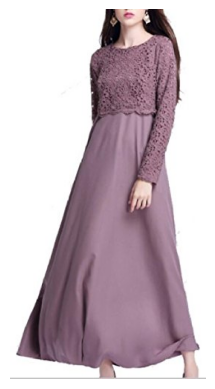

In [ ]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

def show_image_from_url(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Example usage
image_url = 'https://images-na.ssl-images-amazon.com/images/I/4196%2BTu5T%2BL.jpg'
show_image_from_url(image_url)


In [ ]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load pre-trained VGG model without the fully connected layers
base_model = VGG16(weights='imagenet', include_top=False)

# Define the layers from which to extract features
layer_names = ['block5_conv3']  # Choose an appropriate layer for feature extraction
layers_output = [base_model.get_layer(name).output for name in layer_names]

# Create a new model for feature extraction
feature_extraction_model = Model(inputs=base_model.input, outputs=layers_output)

# Function to divide an image into equal square regions and extract representations
def extract_region_representations_from_url(image_url, num_regions_per_side=2):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))  # Read image from URL
    img = img.resize((224, 224))  # Resize image to VGG input size
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)  # Preprocess input according to VGG requirements
    features = feature_extraction_model.predict(x)  # Extract features using VGG model
    print("Shape of features array:", features.shape)
    region_size = features.shape[1] // num_regions_per_side  # Calculate region size
    representations = []
    for i in range(num_regions_per_side):
        for j in range(num_regions_per_side):
            region = features[:, i*region_size:(i+1)*region_size, j*region_size:(j+1)*region_size, :]
            representation = np.mean(region, axis=(1, 2))  # Compute mean representation for the region
            representations.append(representation)
    return representations

# Example usage
image_url = 'https://images-na.ssl-images-amazon.com/images/I/4196%2BTu5T%2BL.jpg'
region_representations = extract_region_representations_from_url(image_url)

# Each element in region_representations contains the representation vector for one region
print("Number of regions:", len(region_representations))
print("Representation vector shape for each region:", region_representations[0].shape)

1/1 [==============================] - 1s 678ms/step
Shape of features array: (1, 14, 14, 512)
Number of regions: 4
Representation vector shape for each region: (1, 512)


In [ ]:
region_representations

[array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         1.3989912e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         7.6753974e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e